

# Project: Investigate a Dataset (No-Show Appointments!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encodingof the last column: it says ‘No’ if the patient showed up to their appointment, and did not show up.
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

# First we will import Libraies

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [141]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [142]:
# We make a copy to avoid mistakes. 
df_clean = df.copy()

In [143]:
# checking shape of data:
df_clean.shape

(110527, 14)

In [144]:
# checking datastructure of data:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


# we have 4 objects and all is integers.

In [145]:
# checking for missing values:
df_clean.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [146]:
# checking numbers of unique values in each features:
df_clean.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [147]:
# describe some statistics on data:
df_clean.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [148]:
# i saw -1 in age columns i will mask it then clean and delete the row with value = (-1) in Age column:

mask = df_clean.query('Age == -1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [149]:
df_clean.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [150]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [151]:
# Again checking for missing values:

df_clean.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [152]:
# checking unique patient id :

df_clean['PatientId'].nunique()

62299

In [153]:
# checking duplicated patient id:

df_clean['PatientId'].duplicated().sum()

48228

In [154]:
# check if these duplicated patient id also were in no-show to remove (it):

df_clean.duplicated(['PatientId','No-show']).sum()

38710


### Data Cleaning (Replace this with more specific notes!)


- For consistency drop values like -1 in age column.

- Labeling columns names.

- drop duplicated rows in data.

- drop unnessecairly columns.


In [155]:
# i will drop the row with -1 in age column

df_clean.drop(index = 99832, inplace = True)

In [156]:
df_clean.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [157]:
df_clean.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [158]:
# checking cols label and make it lower case and modifiy them:

df_clean.rename(columns = {'Hipertension': 'Hypertension', 'No-show': 'No_Show'}, inplace = True)
df_clean.rename(columns = lambda x: x.strip().lower(),inplace= True)
df_clean.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [159]:
# We will drop any duplicates rows in Patientid and n_show to be cleaned:
df_clean.drop_duplicates(['patientid','no_show'], inplace = True)

In [160]:
df_clean.shape

(71816, 14)

In [161]:
# drop not important features like [patientid,appointmentid,scheduledday,appointmentday]

df_clean.drop(columns = ['patientid','appointmentid','scheduledday','appointmentday'], axis= 1, inplace = True)
df_clean.head(2)

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [162]:
# now we have this effected shape:

df_clean.shape

(71816, 10)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (full look to all features!)

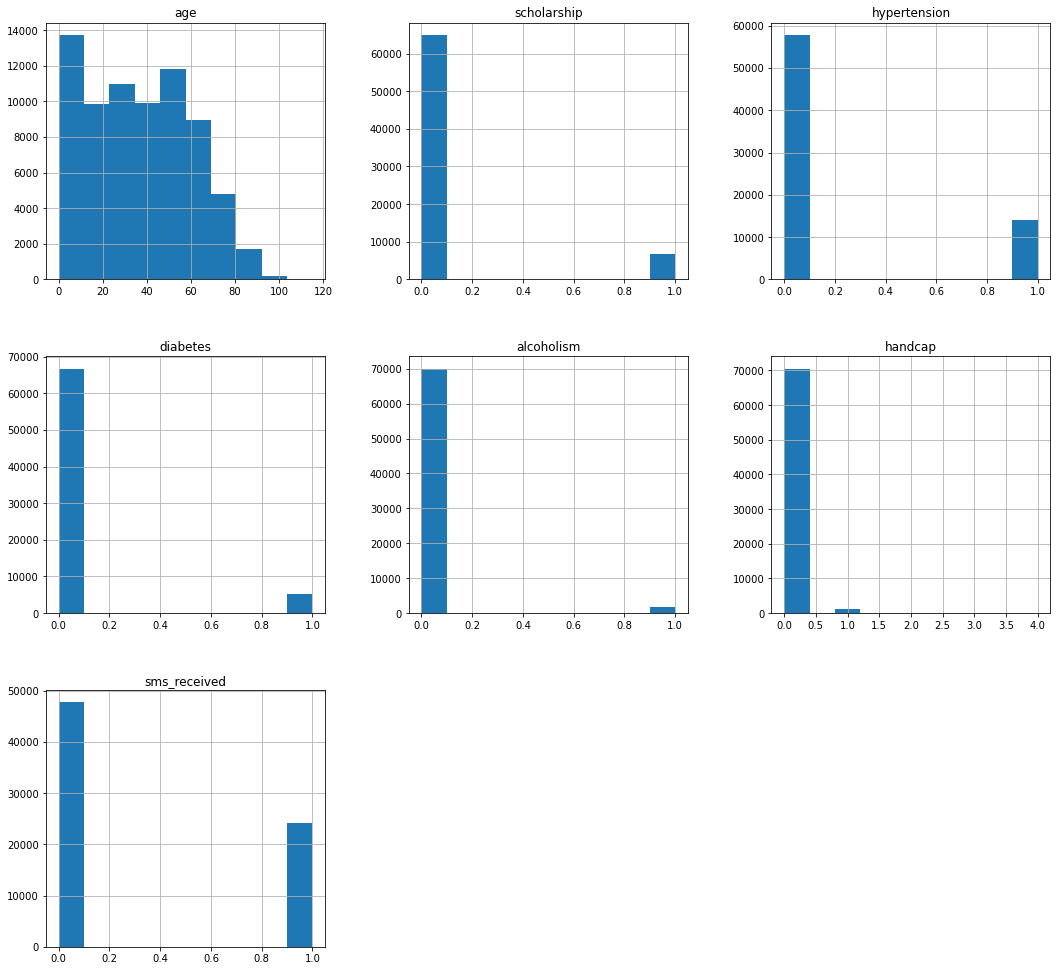

In [163]:
df_clean.hist(figsize=(18,17));

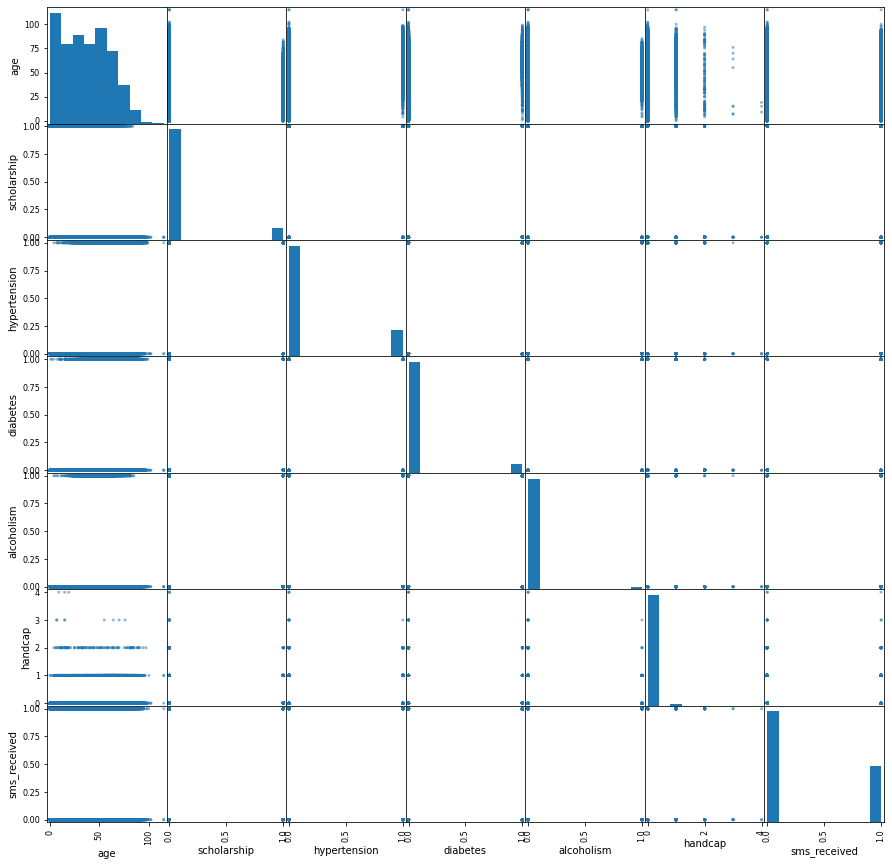

In [164]:
pd.plotting.scatter_matrix(df_clean,figsize=(15,15));

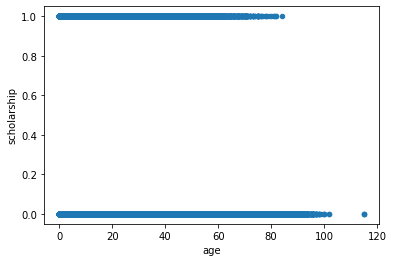

In [165]:
df_clean.plot(x='age', y= 'scholarship', kind= 'scatter' );

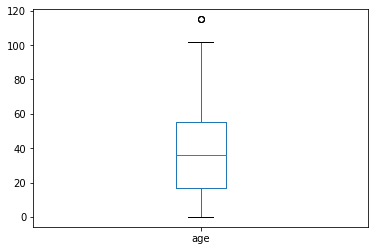

In [166]:
df_clean['age'].plot(kind='box' );

In [167]:
df_clean

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110518,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


- Will divide the our people into column no_show to two section [positive (no) and negative(yes)]
- And count the total for attendes and who didn`t attend ''

In [168]:
# will divide the our people in column no_show to two section [positive (no) and negative(yes)]
# and count the total for attendes and who didn`t attend 

positive = df_clean[df_clean['no_show'] == 'No']
negative = df_clean[df_clean['no_show'] == 'Yes']
positive.count(), negative.count()

(gender           54153
 age              54153
 neighbourhood    54153
 scholarship      54153
 hypertension     54153
 diabetes         54153
 alcoholism       54153
 handcap          54153
 sms_received     54153
 no_show          54153
 dtype: int64,
 gender           17663
 age              17663
 neighbourhood    17663
 scholarship      17663
 hypertension     17663
 diabetes         17663
 alcoholism       17663
 handcap          17663
 sms_received     17663
 no_show          17663
 dtype: int64)

In [169]:
# count the average for both

positive.mean(), negative.mean()

(age             37.229166
 scholarship      0.091334
 hypertension     0.202944
 diabetes         0.072868
 alcoholism       0.023600
 handcap          0.020904
 sms_received     0.297232
 dtype: float64,
 age             34.376267
 scholarship      0.108419
 hypertension     0.170922
 diabetes         0.065108
 alcoholism       0.029440
 handcap          0.017777
 sms_received     0.453094
 dtype: float64)

- Find out that:
- positive mean age is 37 '''
- negative mean age is 34 '''

<AxesSubplot:ylabel='age'>

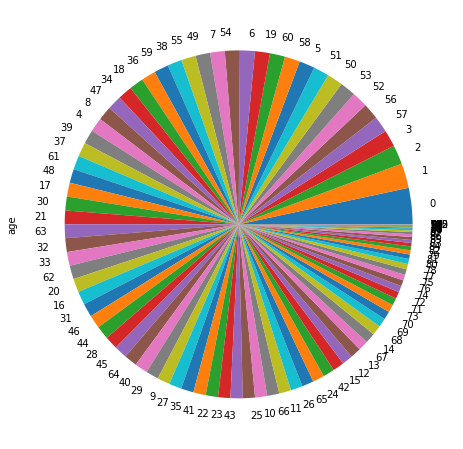

In [170]:
plt.figure(figsize=(12,8))
positive.age.value_counts().plot(kind= 'pie')

<AxesSubplot:ylabel='age'>

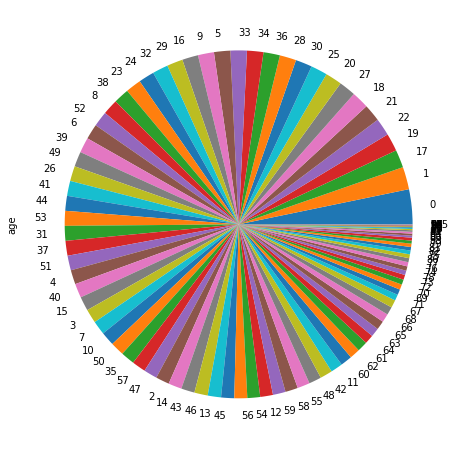

In [171]:
plt.figure(figsize=(12,8))
negative.age.value_counts().plot(kind= 'pie')

In [172]:
df_clean.columns

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

 ### Research Question 2  (Does Age  an effected feature on handcap and scholarship !)


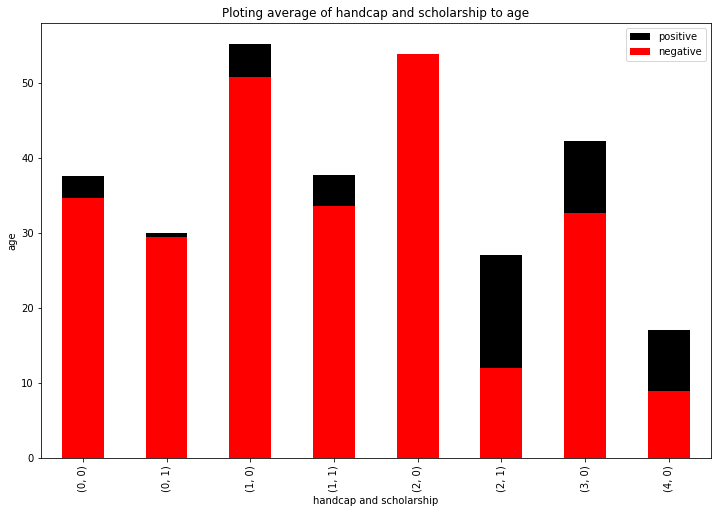

In [173]:
# age effected in attendence or not ?
plt.figure(figsize=(12,8))
positive.groupby(['handcap','scholarship']).mean()['age'].plot(kind= 'bar',color= 'black', label= 'positive')
negative.groupby(['handcap','scholarship']).mean()['age'].plot(kind= 'bar',color= 'red', label= 'negative')
plt.legend()
plt.title("Ploting average of handcap and scholarship to age")
plt.xlabel('handcap and scholarship')
plt.ylabel('age');


# I think [handcap','scholarship' ] they have not  great effect on attendence.

In [174]:
positive.groupby(['handcap','scholarship']).mean()['age'].value_counts()
negative.groupby(['handcap','scholarship']).mean()['age'].value_counts()

53.807692    1
29.463041    1
34.708540    1
50.766520    1
32.666667    1
12.000000    1
33.650000    1
9.000000     1
Name: age, dtype: int64



 ### Research Question 3  (Do hypertension and diabetes affect on attendence or not!)


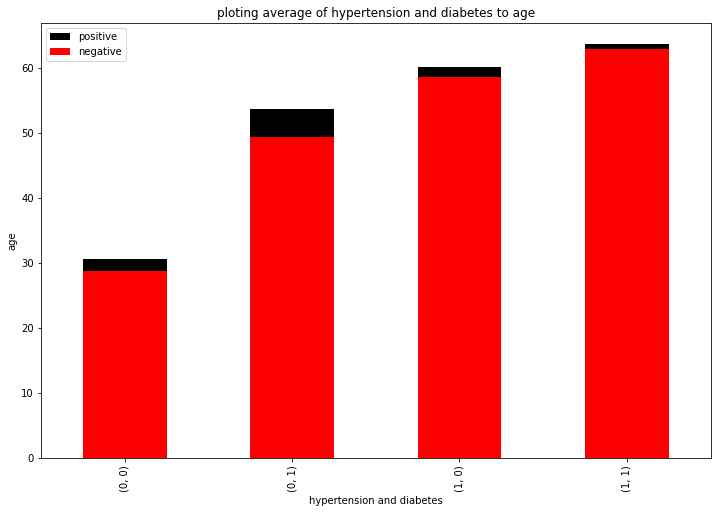

In [175]:
plt.figure(figsize=(12,8))
positive.groupby(['hypertension','diabetes']).mean()['age'].plot(kind= 'bar',color= 'black', label= 'positive')
negative.groupby(['hypertension','diabetes']).mean()['age'].plot(kind= 'bar',color= 'red', label= 'negative')
plt.legend()
plt.title('ploting average of hypertension and diabetes to age')
plt.xlabel('hypertension and diabetes')
plt.ylabel('age');

In [176]:
# confirm our plot 

positive.groupby(['hypertension','diabetes']).mean()['age'],negative.groupby(['hypertension','diabetes']).mean()['age']

(hypertension  diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: age, dtype: float64,
 hypertension  diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: age, dtype: float64)

- I think they dont affect on patient attendece""



### Research Question 4  (who is attending more female or male!)



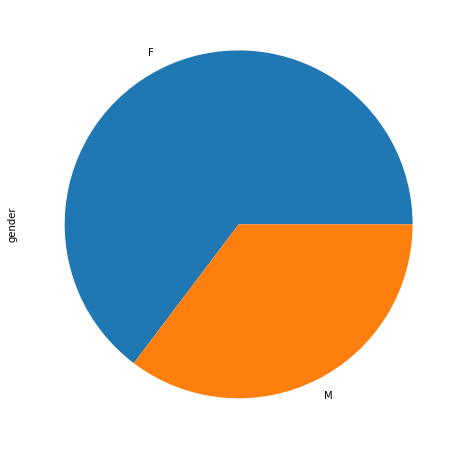

In [177]:
# age effected in attendence or not ?

plt.figure(figsize=(12,8))
df_clean['gender'].value_counts().plot( kind= 'pie');

- Female is more than male in both cases

In [178]:
# confirm our plot

positive['gender'].value_counts(),negative['gender'].value_counts()

(F    34960
 M    19193
 Name: gender, dtype: int64,
 F    11506
 M     6157
 Name: gender, dtype: int64)

- Female is higher than in positive and negative.'''

### Research Question 4  (Does sms is an effected features?!)


Text(0.5, 1.0, 'ploting on relation of  neighbourhood and sms_received')

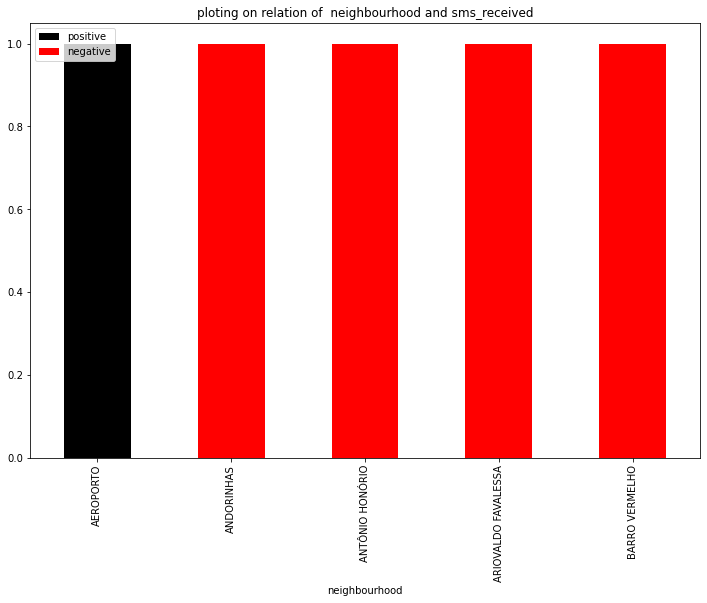

In [179]:
plt.figure(figsize= (12,8))
positive.groupby('neighbourhood').max().head(5)['sms_received'].plot( kind= 'bar',color= 'black', label= 'positive');
negative.groupby('neighbourhood').max().head(5)['sms_received'].plot( kind= 'bar',color= 'red', label= 'negative');
plt.legend()
plt.title('ploting on relation of  neighbourhood and sms_received')

In [180]:
positive.groupby('neighbourhood').max().head(5)['sms_received'],negative.groupby('neighbourhood').max().head(5)['sms_received']

(neighbourhood
 AEROPORTO              1
 ANDORINHAS             1
 ANTÔNIO HONÓRIO        1
 ARIOVALDO FAVALESSA    1
 BARRO VERMELHO         1
 Name: sms_received, dtype: int64,
 neighbourhood
 AEROPORTO              0
 ANDORINHAS             1
 ANTÔNIO HONÓRIO        1
 ARIOVALDO FAVALESSA    1
 BARRO VERMELHO         1
 Name: sms_received, dtype: int64)

- AEROPORTO is max (all who get sms attend in this neighbourhood).'''
- It seems that receiving sms affect on attending at a lot of neighbourhood.''



### Research Question 5  (which age between neighbourhood has a higher attendance?!)


Text(0.5, 1.0, 'ploting on relation of  neighbourhood and age')

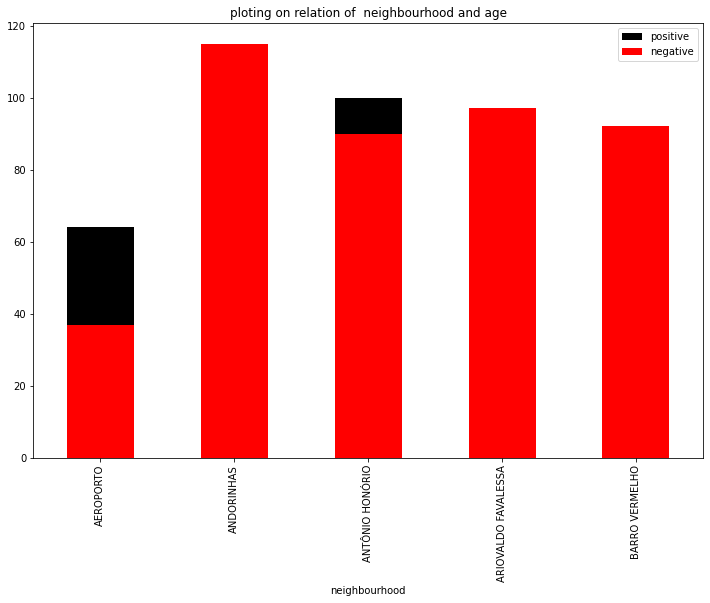

In [181]:
plt.figure(figsize= (12,8))
positive.groupby('neighbourhood').max().head(5)['age'].plot( kind= 'bar',color= 'black', label= 'positive');
negative.groupby('neighbourhood').max().head(5)['age'].plot( kind= 'bar',color= 'red', label= 'negative');
plt.legend()
plt.title('ploting on relation of  neighbourhood and age')

# AEROPORTO  has a higher attendence age from 40 to 60             


In [182]:
positive.groupby('neighbourhood').max().head(3)['age']

neighbourhood
AEROPORTO           64
ANDORINHAS         115
ANTÔNIO HONÓRIO    100
Name: age, dtype: int64

## Conclusions
### Analysis


- I think (handcap','scholarship') they have not  great effect on attendence.
- It is very clear that high numbers of Age (40 to 60)are active and effective on attendence.
- I see that Female numbers is more than male in attendence.
- Reciveing sms effect on attendence but there is number of people not attending and received sms is higher so we have to check sms compagin.
- (AEROPORTO,ANDORINHAS,ANTÔNIO HONÓRIO) are neighbourhoods have max attendence for age between(40:60).